# Exploring DNN learning with TensorFlow

In this assignment we'll dive a little deeper with a series of hands on exercises to better understand DNN learning with Tensorflow. Remember that I could be asking you questions about this assignment in the Quiz!

We will work with the [Fashion MNIST Dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data). This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. 

We will define a possible model for you start working:

Label 	Description

0 	T-shirt/top

1 	Trouser

2 	Pullover

3 	Dress

4 	Coat

5 	Sandal

6 	Shirt

7 	Sneaker

8 	Bag

9 	Ankle boot

In [2]:
import tensorflow as tf

# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()




Neural Networks learn the best when the data is scaled / normalized to fall in a constant range. One practitioners often use is the range [0,1]. How might you do this to the training and test images used here?

*A hint: these images are saved in the standard [RGB](https://www.rapidtables.com/web/color/RGB_Color.html) format*

In [3]:
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28)
(60000,)


In [5]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


### Exploring Labels

In [6]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
print(training_labels[3])

3


### Exploring images

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
np.set_printoptions(linewidth=200)
print(training_images[5])

[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143   9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197 206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179 183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174 175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197 193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213 214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90 135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36   0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 203 184 168 163 162 163 178 221 18

     Label of image 5 is: 2


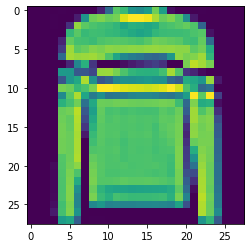

In [14]:
img = 5
print("     Label of image {} is: {}".format(img, training_labels[img]))
plt.imshow(training_images[img]);

### Preprocessing Data 
**Normalizing Data**: 
We notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'.

In [16]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [17]:
training_images.max()

1.0

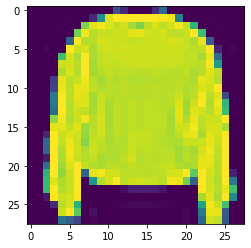

In [20]:
plt.imshow(training_images[7]);

Using these improved images lets compile our model using an adaptive optimizer to learn faster and a categorical loss function to differentiate between the the various classes we are trying to classify. Since this is a very simple dataset we will only train for 5 epochs.

In [27]:
# Define the base model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
# compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [34]:
# fit the model to the training data
history= model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2653 - accuracy: 0.9015
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2523 - accuracy: 0.9060
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2411 - accuracy: 0.9090
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2328 - accuracy: 0.9126
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2215 - accuracy: 0.9158


In [35]:
train_eval = model.evaluate(training_images, training_labels)
print ("Training data Accuracy: {:.1f}%".format(train_eval[1]*100))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2129 - accuracy: 0.9195
Training data Accuracy: 91.9%


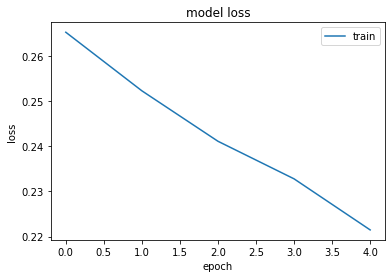

In [36]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

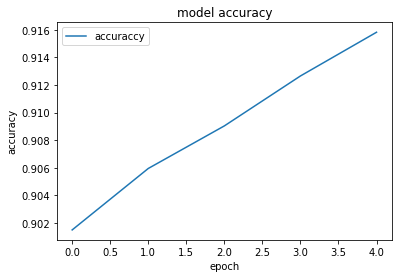

In [37]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuraccy'], loc='upper left')
plt.show()

## Testing the trained model

In [38]:
test_eval = model.evaluate(test_images, test_labels)
print ("Testing data Accuracy: {:.1f}%".format(test_eval[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8846
Testing data Accuracy: 88.5%


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.8648. This tells you that your neural network is about 86% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 86% of the time. But how would it work with unseen data? That's why we have the test images. We can call ```model.evaluate```, and pass in the two sets, and it will report back the loss for each. This should reach about .8747 or thereabouts, showing about 87% accuracy. Not Bad!

But what did it actually learn? If we inference on the model using ```model.predict``` we get out the following list of values. **What does it represent?**

*A hint: trying running ```print(test_labels[0])```*

In [39]:
classifications = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [40]:
print(classifications[0])

[5.1391791e-10 6.5823941e-10 1.0280921e-11 8.2266079e-13 6.9460548e-11 1.0697425e-03 1.1985464e-10 5.3863027e-03 4.4082853e-09 9.9354398e-01]


In [41]:
# Returns the indices of the maximum values along an axis.
np.argmax(classifications[0])

9

Let's now look at the layers in your model. What happens if you double the number of neurons in the dense layer. What different results do you get for loss, training time etc? Why do you think that's the case? 

In [42]:
NUMBER_OF_NEURONS = 20

# define the new model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(NUMBER_OF_NEURONS, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5782 - accuracy: 0.7995
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4301 - accuracy: 0.8494
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4007 - accuracy: 0.8591
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3815 - accuracy: 0.8653
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.4027 - accuracy: 0.8554


[0.4026678800582886, 0.855400025844574]

Consider the effects of additional layers in the network instead of simply more neurons to the same layer. First update the model to add an additional dense layer into the model between the two existing Dense layers.

In [ ]:
YOUR_NEW_LAYER = #YOUR_CODE_HERE#

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Lets then compile, fit, and evaluate our model. What happens to the error? How does this compare to the original model and the model with double the number of neurons?

In [ ]:
# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Before you trained, you normalized the data. What would be the impact of removing that? To see it for yourself fill in the following lines of code to get a non-normalized set of data and then re-fit and evaluate the model using this data.

In [ ]:
# get new non-normalized mnist data
training_images_non = #YOUR_CODE_HERE#
test_images_non = #YOUR_CODE_HERE#

# re-compile, re-fit and re-evaluate
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images_non, training_labels, epochs=5)
model.evaluate(test_images_non, test_labels)
classifications = model.predict(test_images_non)